In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class KMeans(object):
    
    def __init__(self): #No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [5 pts]
        np.random.seed(1)
        #Try to turn dim from MxD to MxNxD
        #Expand on axis 1
        nx = np.expand_dims(x,1)
        nx = np.repeat(nx,y.shape[0],axis=1)
        
        
        #shape[0] is row size
        ny = np.expand_dims(y,0)
        ny = np.repeat(ny,x.shape[0],axis=0)
        diff = np.subtract(nx, ny)
        sq = np.square(diff)
        su = np.sum(sq,axis=2)
        root = np.sqrt(su)
        return root
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        #raise NotImplementedError

    def _init_centers(self, points, K, **kwargs): # [5 pts]
        np.random.seed(1)
        arr = np.arange(K)
        np.random.choice(arr, size = K, replace = False)
        return points[arr,:]
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        

    def _update_assignment(self, centers, points): # [10 pts]
        np.random.seed(1)
        dist = self.pairwise_dist(points,centers)
        minDist = np.argmin(dist,axis = -1)
        return minDist
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
        #raise NotImplementedError
    
    def _update_centers(self, old_centers, cluster_idx, points): # [10 pts]
        np.random.seed(1)
        arr = np.zeros(old_centers.shape)
        for i in range(old_centers.shape[0]):
            new = points[cluster_idx==i]
            arr[i] = np.mean(new,axis=0)
        return arr
            

        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        #raise NotImplementedError

    def _get_loss(self, centers, cluster_idx, points): # [5 pts]
        np.random.seed(1)
        
        loss = 0
        dist = self.pairwise_dist(points,centers)
        for i in range(dist.shape[0]):
            loss += np.sum(np.square(dist[i,cluster_idx[i]]))
        return loss
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """    
        #raise NotImplementedError
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss
    
    def find_optimal_num_clusters(self, data, max_K=15): # [10 pts]
        np.random.seed(1)
        #import matplotlib.pyplot as plt
        """Plots loss values for different number of clusters in K-Means
        
        Args:
            image: input image of shape(H, W, 3)
            max_K: number of clusters
        Return:
            losses: a list, which includes the loss values for different number of clusters in K-Means
            Plot loss values against number of clusters
        """
            
        x_axis = np.arange(1,max_K)
        loss = []
        for k in range(1,max_K):
            cluster_idx, centers, l = self(data,k)
            loss += [l]
        fig, ax = plt.subplots()
        ax.plot(x_axis,loss)
        ax.set(xlabel = '# of Clusters',ylabel = 'Loss')
        ax.grid()
        plt.show()
        return loss
        #raise NotImplementedError

In [ ]:
def visualize (cluster_idx,centers,K,name_list,flag=0):
   
    num_list = [np.sum(np.array(cluster_idx) == i) for i in range(0,K)]

    x =list(range(len(num_list)))
    total_width, n = 0.8, 2
    width = total_width / n
    plt.figure(figsize=(10,5))
    plt.title('Visualization for '+ str(K) + ' clusters', fontdict = {'fontsize' : 18})
    plt.bar(x, num_list, width=width, label='number',tick_label = name_list, fc = 'orchid')

    plt.legend()
    
    plt.show()

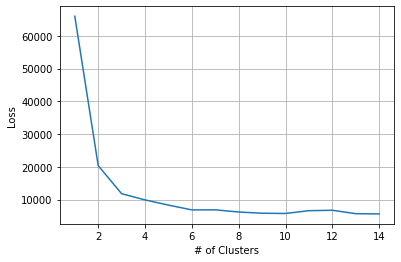

[65956.07122605552,
 20367.56387338043,
 11798.399473413423,
 9911.328549427535,
 8326.388976166272,
 6859.920598617803,
 6877.1822941920145,
 6213.802165439014,
 5843.266817311434,
 5770.097712582863,
 6622.633305797319,
 6748.93227521303,
 5706.9379415818175,
 5634.699550885697]

In [ ]:
data = pd.read_csv('top_3_each_team_clean.csv')
data = data.loc[:,data.columns != 'Unnamed: 1']
data = data.loc[:,data.columns != 'Team']
dat = data.to_numpy()
KMeans().find_optimal_num_clusters(dat)


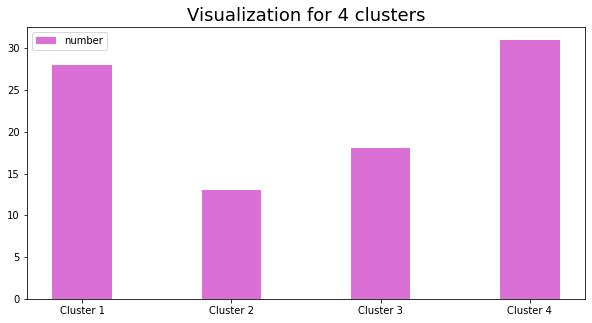

In [24]:
cluster_idx5, centers5, loss5 = KMeans()(dat, 4)
visualize(cluster_idx5, centers5, 4, ['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
np.savetxt("kmeans.csv", cluster_idx5, delimiter=",")